In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

%matplotlib inline 

# Удаление дубликатов в данных

In [ ]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"], "k2": [1, 1, 2, 3, 3, 4, 4], 
                     "k3": [1, 1, 2, 3, 3, 4, 4], "k4":[1, 1, 1, 1, 1, 1, 1]})
data

In [ ]:
data.duplicated()

In [ ]:
data.drop_duplicates()

In [ ]:
data.T.drop_duplicates().T

In [ ]:
data.drop(data.columns[data.nunique() == 1], axis=1)

# Заполнение пропусков в данных

Nan - маркер отсутствия данных.

In [ ]:
float_data = pd.Series([1.2, -3.5, np.nan, 0])
float_data

In [ ]:
float_data.isna()

In [ ]:
float_data.notna()

Удаление данных с пропусками

In [ ]:
data = pd.DataFrame([[1., 6.5, 3., np.nan], [1., np.nan, np.nan, np.nan], [np.nan, np.nan, np.nan, np.nan], 
                     [np.nan, 6.5, 3., np.nan]])
data

In [ ]:
data.dropna()

In [ ]:
data.dropna(how="all")

In [ ]:
data.dropna(axis="columns", how="all")

In [ ]:
data.dropna(thresh=2)

Восполнение отсутствующих данных

In [ ]:
df = pd.DataFrame(np.random.standard_normal((7, 3)))
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
df

In [ ]:
df.fillna(0)

In [ ]:
df.fillna({1: 0.5, 2: 0})

In [ ]:
df.fillna(method="bfill")

In [ ]:
df.fillna(method="bfill", limit=2)

In [ ]:
df.fillna(data.mean())

In [ ]:
df.fillna(data.median())

Медиана более устойчива к выбросам

In [ ]:
data_all = []
for i in range(1000):
    data = []
    for i in range(1000):
        if np.random.random() >= 0.90:
            data.append(np.random.normal(1, 1, 1)[0])
        else:
            data.append(np.random.normal(1, 10, 1)[0])
    data_all.append(data)
    
data_all = np.array(data_all)

In [ ]:
res = pd.DataFrame({"mean": data_all.mean(axis=1), "median": np.median(data_all, axis=1)})
res.boxplot()

Создание дополнительного признака

In [ ]:
df["2 is nan"] = df[2].isna().astype(np.int32)
df

Замена значений

In [ ]:
data = pd.Series([1., -999., 2., -999., 4., 3.])
data

In [ ]:
data.replace(-999, np.nan)

# Кодирование признаков

Бинарные факторы: False == 0, True == 1

In [ ]:
data = pd.Series(["male"]*10 + ["female"]*5) 
data

In [ ]:
(data == "male").astype(np.int32)

Категориальные факторы: разбиваем по порядку


In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

df = pd.DataFrame(["moscow", "spb", "moscow", "spb", "spb", "spb", "tomsk", "novgorod", "samara", "saratov"])
df

In [ ]:
enc = OrdinalEncoder()
enc.fit_transform(df)

In [ ]:
enc = OrdinalEncoder()
enc.fit_transform(df)

Категориальные факторы: разбиваем на много бинарных (one hot encoding)

city_is_moscow: 0/1, city_is_spb: 0/1, city_is_tomsk: 0/1 ... 

In [ ]:
ohe = OneHotEncoder()
ohe.fit(df)
ohe.categories_

In [ ]:
pd.DataFrame(ohe.transform(df).toarray(), columns=ohe.categories_)

In [ ]:
pd.get_dummies(df)

Цикличные факторы: время дня => позиция на циферблате => sin, cos угла

# Создание новых признаков

Полиномиальные признаки

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X = np.arange(6).reshape(3, 2)
X

In [ ]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

Другие преобразования: sin x, ln x

Дискретизация и группировка по интервалам

In [ ]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
pd.DataFrame(ages).hist()

In [ ]:
bins = [18, 25, 35, 60, 100]
age_categories = pd.cut(ages, bins)
age_categories

In [ ]:
age_categories.codes

# Преобразование данных

Приведение к единой шкале: StandardScaler, MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
scaler.fit_transform(data)

In [ ]:
scaler = StandardScaler()
scaler.fit_transform(data)

Логарифмирование, преобразование Бокса-Кокса

In [ ]:
from scipy. stats import boxcox 

data = np.random.exponential(size= 1000)
sns.distplot(data, hist= False, kde= True)

In [ ]:
transformed_data = np.log(data) 
sns.distplot(transformed_data, hist=False, kde=True)

In [ ]:
transformed_data, best_lambda = boxcox(data) 

sns.distplot(transformed_data, hist=False , kde=True)

In [ ]:
best_lambda

# Домашнее задание

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")

In [3]:
df

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,...,1,2,13,40.0,2018.0,16,3,0,1,2360
1,2,3,-1.0,44872,8.0,-1.0,3,7,4,1982,...,4,2,13,108.0,1993.0,34,3,0,1,3060
2,4,3,-1.0,55927,16.0,4.2,0,4,5,2014,...,4,2,13,55.0,2019.0,35,3,0,1,2648
3,5,0,-1.0,41405,10.3,-1.0,0,4,4,2000,...,4,2,13,55.0,2003.0,10,3,0,1,2513
4,7,8,-1.0,22523,19.0,-1.0,0,4,8,2000,...,4,1,13,62.0,2005.0,10,3,0,1,2703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,61224,9,-1.0,34558,11.2,6.6,0,4,4,2004,...,1,2,13,47.0,2016.0,15,3,0,1,2510
43241,61225,3,-1.0,38268,9.6,5.8,0,4,2,2013,...,4,2,13,65.0,2015.0,10,3,0,1,2808
43242,61226,3,-1.0,8958,10.0,9.3,0,4,4,1991,...,4,2,13,55.0,1999.0,16,3,0,1,2520
43243,61227,3,-1.0,20293,8.5,-1.0,0,5,4,2002,...,1,2,13,70.0,2004.0,28,3,0,1,2755


Данные: технические характеристики разных конфигураций автомобилей

Таргет: длина колесной базы конфигурации (в миллиметрах).

In [4]:
df.shape

(43245, 32)

In [5]:
# посмотрим данные
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43245 entries, 0 to 43244
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           43245 non-null  int64  
 1   back-suspension                 43245 non-null  int64  
 2   battery-capacity                43245 non-null  float64
 3   charge-time                     43245 non-null  int64  
 4   compression                     43245 non-null  float64
 5   consumption-mixed               43245 non-null  float64
 6   cylinders-order                 43245 non-null  int64  
 7   cylinders-value                 43245 non-null  int64  
 8   engine-feeding                  43245 non-null  int64  
 9   engine-start                    43245 non-null  int64  
 10  engine-stop                     43245 non-null  int64  
 11  engine-type                     43245 non-null  int64  
 12  gear-type                       

In [6]:
# посмотрим пустые значения
df.isna().sum()

index                             0
back-suspension                   0
battery-capacity                  0
charge-time                       0
compression                       0
consumption-mixed                 0
cylinders-order                   0
cylinders-value                   0
engine-feeding                    0
engine-start                      0
engine-stop                       0
engine-type                       0
gear-type                         0
luxury                            0
max-speed                         0
power-electro-kw                  0
supply-system                     0
valves                            0
valvetrain                        0
weight                            0
configurations_auto-premiere      0
configurations_back-wheel-base    0
configurations_front-brake        0
configurations_safety-rating      0
configurations_seats              0
configurations_tank-volume        0
supergen_year-stop                0
models_country-from         

In [7]:
# приведем заголовки к одинаковому формату
col = ['_'.join(c.split('-')) for c in list(df.columns)]
df.columns = col

In [8]:
# проверим дубликаты
df.duplicated().sum()

0

Дубликатов и пустых знаечний нет.
Построим боксплоты, чтобы посмотреть выбросы

Количественные переменные, включаемые в модель: ['battery_capacity', 'charge_time', 'compression', 'consumption_mixed', 'cylinders_value', 'durability', 'luxury', 'max_speed', 'power_electro_kw', 'valves', 'weight', 'configurations_auto_premiere', 'configurations_back_wheel_base', 'configurations_seats', 'configurations_tank_volume', 'supergen_year_stop', 'durability']

In [9]:
per = ['battery_capacity', 'charge_time', 'compression', 'consumption_mixed', 'cylinders_value', 'durability', 'luxury', 'max_speed', 'power_electro_kw', 'valves', 'weight', 'configurations_auto_premiere', 'configurations_back_wheel_base', 'configurations_seats', 'configurations_tank_volume', 'supergen_year_stop', 'durability']

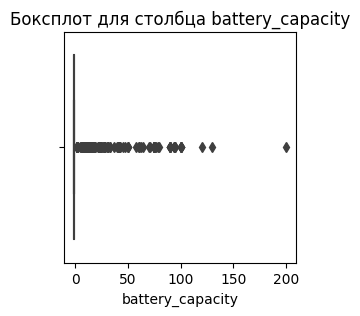

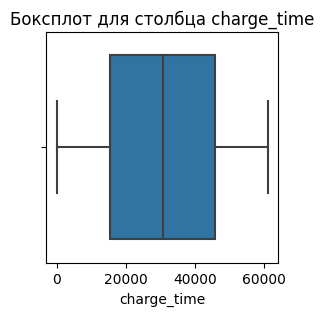

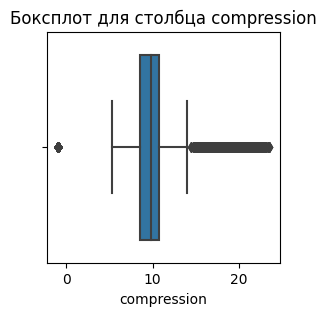

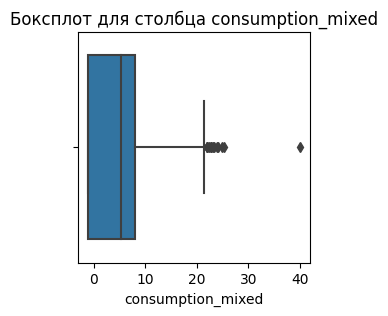

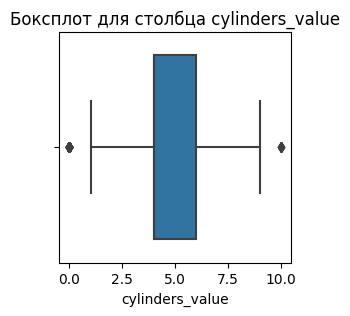

ValueError: Could not interpret input 'durability'

<Figure size 300x300 with 0 Axes>

In [10]:
# построим для них боксплоты
for i in per:
    plt.figure(figsize = (3,3))
    sns.boxplot(data=df, x=i)
    plt.title(f'Боксплот для столбца {i}')
    plt.show()

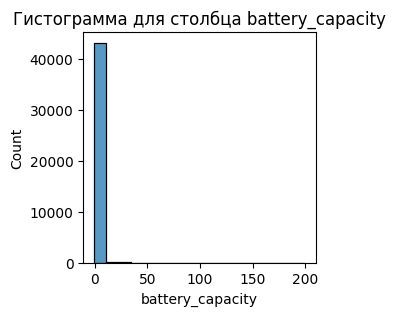

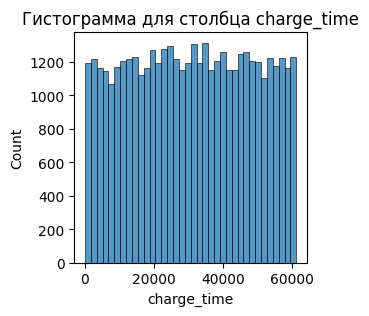

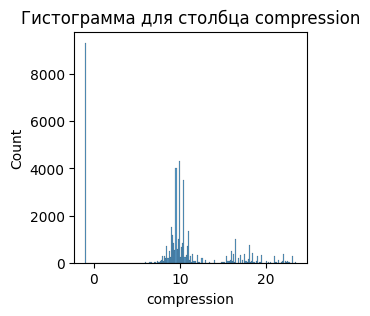

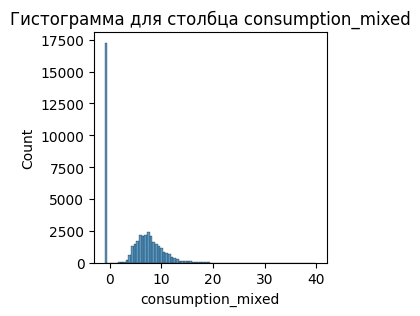

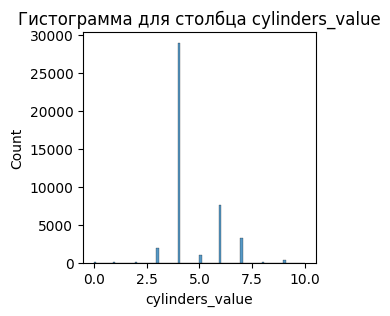

KeyError: 'durability'

<Figure size 300x300 with 0 Axes>

In [11]:
# посмотрим на распределение частот
for i in per:
    plt.figure(figsize = (3,3))
    sns.histplot(data=df[i])
    plt.title(f'Гистограмма для столбца {i}')
    plt.show()


In [12]:
for c in per:
    q3 = df[c].describe()['75%']    # 75-ая квантиль
    q1 = df[c].describe()['25%']    # 25-ая квантиль
    iqr = q3-q1    # длина промежутка
    iqr_min = q1 - 1.5 * iqr    # нижняя граница
    iqr_max = q3 + 1.5 * iqr    # верхняя граница
    df = df[(iqr_min <= df[c]) & (df[c] <= iqr_max)] 


KeyError: 'durability'

In [13]:
df

,index,back_suspension,battery_capacity,charge_time,compression,consumption_mixed,cylinders_order,cylinders_value,engine_feeding,engine_start,...,configurations_front_brake,configurations_safety_rating,configurations_seats,configurations_tank_volume,supergen_year_stop,models_country_from,models_group,models_light_and_commercial,models_male,target
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,...,1,2,13,40.0,2018.0,16,3,0,1,2360
1,2,3,-1.0,44872,8.0,-1.0,3,7,4,1982,...,4,2,13,108.0,1993.0,34,3,0,1,3060
3,5,0,-1.0,41405,10.3,-1.0,0,4,4,2000,...,4,2,13,55.0,2003.0,10,3,0,1,2513
5,8,8,-1.0,22100,9.6,6.0,0,4,2,2014,...,4,2,13,45.0,2017.0,10,3,0,1,2468
10,14,3,-1.0,26825,8.5,-1.0,0,6,4,1986,...,1,2,13,-1.0,1988.0,16,3,0,0,2660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,61224,9,-1.0,34558,11.2,6.6,0,4,4,2004,...,1,2,13,47.0,2016.0,15,3,0,1,2510
43241,61225,3,-1.0,38268,9.6,5.8,0,4,2,2013,...,4,2,13,65.0,2015.0,10,3,0,1,2808
43242,61226,3,-1.0,8958,10.0,9.3,0,4,4,1991,...,4,2,13,55.0,1999.0,16,3,0,1,2520
43243,61227,3,-1.0,20293,8.5,-1.0,0,5,4,2002,...,1,2,13,70.0,2004.0,28,3,0,1,2755


In [14]:
df.shape

(26412, 32)

## Baseline

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [31]:
X = df.drop(["target"], axis=1)
y = df[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
reg = LinearRegression().fit(train_X, train_y)

In [18]:
reg.score(train_X, train_y)

0.5214865598190517

In [19]:
mean_squared_error(reg.predict(train_X), train_y)

24740.288681227288

In [20]:
scores = cross_validate(reg, train_X, train_y, cv=3, 
                        scoring=('neg_mean_squared_error'))

In [21]:
scores

{'fit_time': array([0.01795244, 0.01698399, 0.01393747]),
 'score_time': array([0.00598383, 0.0029881 , 0.00299215]),
 'test_score': array([-24403.5715258 , -25828.93750462, -24437.32403729])}

In [22]:
mean_squared_error(reg.predict(test_X), test_y)

23491.70118750705

In [23]:
r2_score(test_y, reg.predict(test_X))

0.5307370715609642

In [24]:
x = df.drop(["target"], axis=1)
y = df[["target"]]
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.33, random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import  mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# обучим нашу модель
model = Ridge()

model.fit(train_x, train_y)

print(model.coef_, model.intercept_)

predictions = model.predict(test_x)
# проверяем r2
r2 = r2_score(test_y, predictions) 
r2

[[-2.53557575e-05  1.76449740e+00  0.00000000e+00  3.55236142e-03
  -3.23892657e+00 -1.47512481e+00 -3.38551044e+00  8.16489392e+01
  -1.58327342e+01  3.07013758e+00  8.32085835e-03 -4.23259265e+01
   3.08454855e+01  7.08334417e-04 -2.00138056e-01  5.30090680e-01
   7.34605747e+00  5.03889836e-03 -8.50084017e-01  2.01887391e-02
  -3.62231286e-03 -1.06196737e-02  4.24287986e+00 -1.14793707e+01
   1.26648414e+01  2.89952649e+00 -3.43826595e-02  1.73182595e+00
   1.39265678e+00  1.79290726e+02 -1.17108831e-02]] [-4042.32502705]


0.5306836902722835

In [27]:
mean_squared_error(model.predict(train_X), train_y)

24740.896973272735

In [26]:
#r2 улучшился 

Таким образом, удалось сократить ошибку и немного повысить коэффициент детерминации до 53%